In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Налаштування стилю
sns.set_theme(style="whitegrid")

filename = 'museum-visitors.csv'

# Перевірка наявності файлу
if not os.path.exists(filename):
    print(f"❌ ПОМИЛКА: Файл '{filename}' не знайдено!")
else:
    try:
        # Читаємо файл і кажемо pandas, що дати лежать у колонці 'Month'
        df = pd.read_csv(filename, parse_dates=['Month'])

        # Перейменовуємо 'Month' у 'date'
        df = df.rename(columns={'Month': 'date'})

        print("Файл успішно завантажено і колонку дат оброблено!")

    except ValueError:
        # Якщо раптом там немає колонки 'Month', завантажимо "як є"
        print("Увага: Колонку 'Month' не знайдено. Завантажуємо без обробки дат.")
        df = pd.read_csv(filename)
        print("Ось які колонки є у твоєму файлі:", df.columns.tolist())

    # Виводимо перші рядки
    if 'df' in locals():
        display(df.head())

Файл успішно завантажено і колонку дат оброблено!


,date,America Tropical Interpretive Center,Avila Adobe,Chinese American Museum,Gateway to Nature Center,Firehouse Museum,Hellman Quon,IAMLA,Pico House,Visitor Center/ El Tranquilo Gallery,Museum of Social Justice,Biscailuz Gallery/ PK Outdoor Exhibit
0,2014-01-01,6602,24778,1581,NaN,4486,0.0,NaN,2204.0,2961.0,NaN,NaN
1,2014-02-01,5029,18976,1785,NaN,4172,0.0,NaN,1330.0,2276.0,NaN,NaN
2,2014-03-01,8129,25231,3229,NaN,7082,70.0,NaN,4320.0,3116.0,NaN,NaN
3,2014-04-01,2824,26989,2129,NaN,6756,250.0,NaN,3277.0,2808.0,NaN,NaN
4,2014-05-01,10694,36883,3676,NaN,10858,135.0,NaN,4122.0,3987.0,NaN,NaN


In [8]:
# Перевіряємо, чи існує змінна df
if 'df' in locals():
    # 3. Аналіз розміру та типів
    print(f"Розмір датасету: {df.shape}")
    print("\nТипи даних:")
    print(df.dtypes)
    print("\nПропуски:")
    print(df.isna().sum())

    # 4. Видалення дублікатів
    duplicates = df.duplicated().sum()
    print(f"\nКількість дублікатів: {duplicates}")

    if duplicates > 0:
        df = df.drop_duplicates()
        print("Дублікати видалено.")

    # 5. Роки в датасеті
    # Звертаємось до 'date'
    years = df['date'].dt.year.unique()
    print(f"\nРоки в наявності: {years}")
else:
    print("Спочатку успішно виконайте Крок 1.")

Розмір датасету: (90, 12)

Типи даних:
date                                     datetime64[ns]
America Tropical Interpretive Center              int64
Avila Adobe                                       int64
Chinese American Museum                           int64
Gateway to Nature Center                        float64
Firehouse Museum                                  int64
Hellman Quon                                    float64
IAMLA                                           float64
Pico House                                      float64
Visitor Center/ El Tranquilo Gallery            float64
Museum of Social Justice                        float64
Biscailuz Gallery/ PK Outdoor Exhibit           float64
dtype: object

Пропуски:
date                                      0
America Tropical Interpretive Center      0
Avila Adobe                               0
Chinese American Museum                   0
Gateway to Nature Center                 53
Firehouse Museum                          0


In [10]:
if 'df' in locals():
    # 6. Змінити назви стовпців
    # Оскільки 'date' вже правильна, нам достатньо застосувати загальне правило:
    # зробити всі літери маленькими та замінити пробіли на підкреслення.

    df.columns = df.columns.str.lower().str.replace(' ', '_')
    df.columns = df.columns.str.replace('/', '_') # Про всяк випадок для складних назв

    print("Колонки перейменовано:")
    print(df.columns.tolist())

Колонки перейменовано:
['date', 'america_tropical_interpretive_center', 'avila_adobe', 'chinese_american_museum', 'gateway_to_nature_center', 'firehouse_museum', 'hellman_quon', 'iamla', 'pico_house_', 'visitor_center__el_tranquilo_gallery', 'museum_of_social_justice', 'biscailuz_gallery__pk_outdoor_exhibit']


In [13]:
if 'df' in locals():
    # 7. Середня кількість відвідувачів
    # drop(columns=['date']) щоб не рахувати середнє для дати
    avg_visitors = df.drop(columns=['date']).mean()
    print("--- Середня відвідуваність ---")
    print(avg_visitors)

    # 8. Мін та Макс за 2018 рік
    df_2018 = df[df['date'].dt.year == 2018]
    min_max_2018 = df_2018.drop(columns=['date']).agg(['min', 'max'])

    print("\n--- Мін/Макс у 2018 році ---")
    display(min_max_2018)

--- Середня відвідуваність ---
America Tropical Interpretive Center      5336.122222
Avila Adobe                              18840.344444
Chinese American Museum                   2228.055556
Gateway to Nature Center                  1078.810811
Firehouse Museum                          5005.944444
Hellman Quon                               353.461538
IAMLA                                      811.661017
Pico House                                1254.159091
Visitor Center/ El Tranquilo Gallery      2634.800000
Museum of Social Justice                  1872.880952
Biscailuz Gallery/ PK Outdoor Exhibit      964.909091
dtype: float64

--- Мін/Макс у 2018 році ---


,America Tropical Interpretive Center,Avila Adobe,Chinese American Museum,Gateway to Nature Center,Firehouse Museum,Hellman Quon,IAMLA,Pico House,Visitor Center/ El Tranquilo Gallery,Museum of Social Justice,Biscailuz Gallery/ PK Outdoor Exhibit
min,3180,14718,2078,NaN,3306,NaN,965.0,185.0,NaN,2332.0,349.0
max,5837,25173,4960,NaN,8013,NaN,1601.0,2140.0,NaN,3686.0,1790.0


In [15]:
import calendar
import pandas as pd

if 'df' in locals():
    # --- ВИПРАВЛЕННЯ НАЗВ КОЛОНОК ---
    # 1. Прибираємо зайві пробіли на початку/в кінці
    # 2. Робимо всі букви маленькими
    # 3. Замінюємо пробіли всередині на підкреслення
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

    # Виведемо назви, щоб переконатися, що тепер там є 'avila_adobe'
    print("Актуальні назви колонок:", df.columns.tolist())
    print("-" * 30)

    # 9. Місяці з найвищою/найнижчою відвідуваністю у 2015
    df_2015 = df[df['date'].dt.year == 2015].copy()

    # Рахуємо суму (пропускаємо колонку 'date', яка тепер перша)
    # select_dtypes(include='number') гарантує, що ми сумуємо тільки числа
    df_2015['total'] = df_2015.select_dtypes(include='number').sum(axis=1)

    max_idx = df_2015['total'].idxmax()
    min_idx = df_2015['total'].idxmin()

    max_month_name = calendar.month_name[df_2015.loc[max_idx, 'date'].month]
    min_month_name = calendar.month_name[df_2015.loc[min_idx, 'date'].month]

    print(f"2015: Найбільше людей було у місяці: {max_month_name}")
    print(f"2015: Найменше людей було у місяці: {min_month_name}")

    # 10. Avila Adobe: Літо vs Зима 2018
    # Літо: 6, 7, 8. Зима: 12, 1, 2.
    df_2018 = df[df['date'].dt.year == 2018]

    # Тепер звертаємось до правильної назви 'avila_adobe'
    summer = df_2018[df_2018['date'].dt.month.isin([6, 7, 8])]['avila_adobe'].sum()
    winter = df_2018[df_2018['date'].dt.month.isin([12, 1, 2])]['avila_adobe'].sum()

    print(f"\nAvila Adobe (2018) Літо: {summer}")
    print(f"Avila Adobe (2018) Зима: {winter}")
else:
    print("Спочатку завантаж файл (Крок 1)!")

Актуальні назви колонок: ['date', 'america_tropical_interpretive_center', 'avila_adobe', 'chinese_american_museum', 'gateway_to_nature_center', 'firehouse_museum', 'hellman_quon', 'iamla', 'pico_house', 'visitor_center/_el_tranquilo_gallery', 'museum_of_social_justice', 'biscailuz_gallery/_pk_outdoor_exhibit']
------------------------------
2015: Найбільше людей було у місяці: May
2015: Найменше людей було у місяці: February

Avila Adobe (2018) Літо: 66122
Avila Adobe (2018) Зима: 48705


Матриця кореляції порахована.


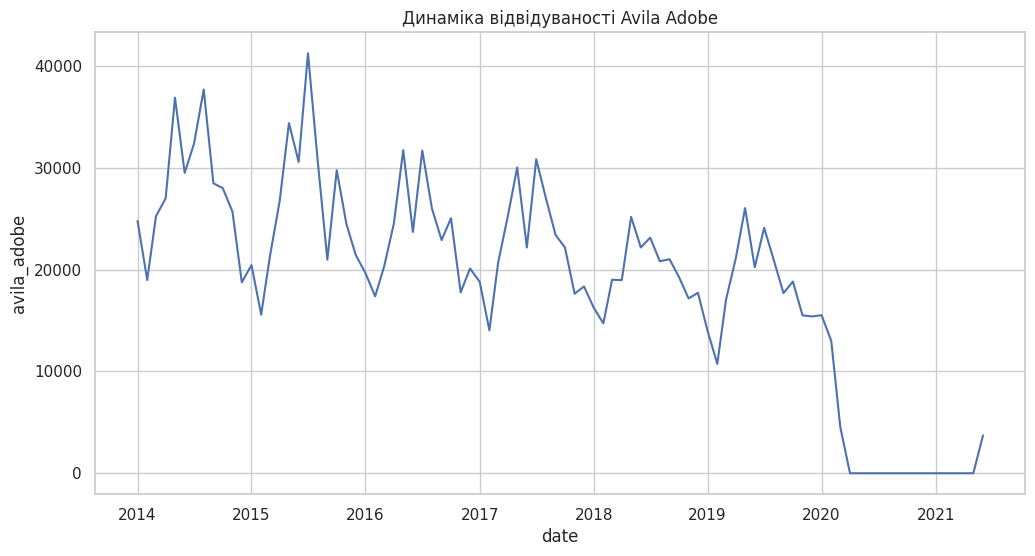

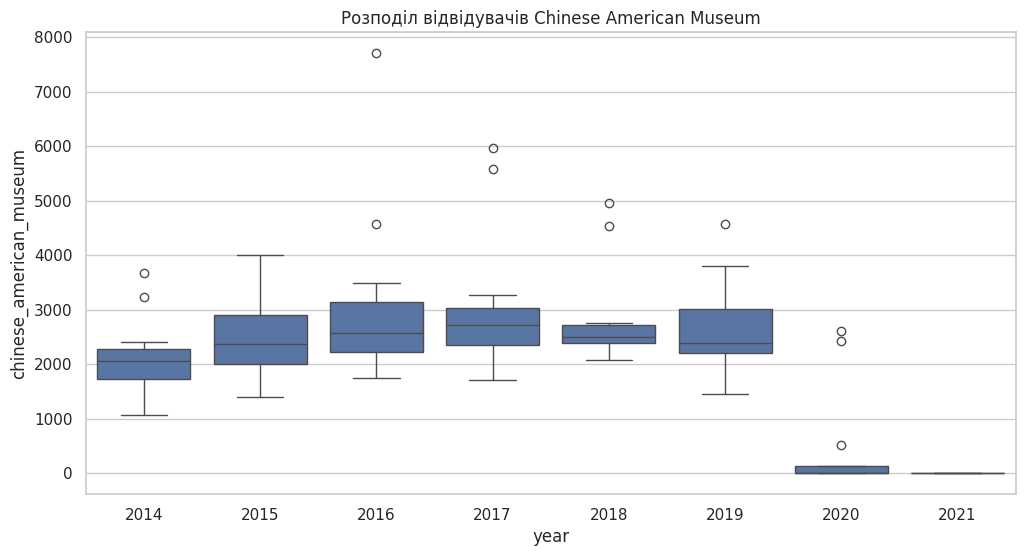

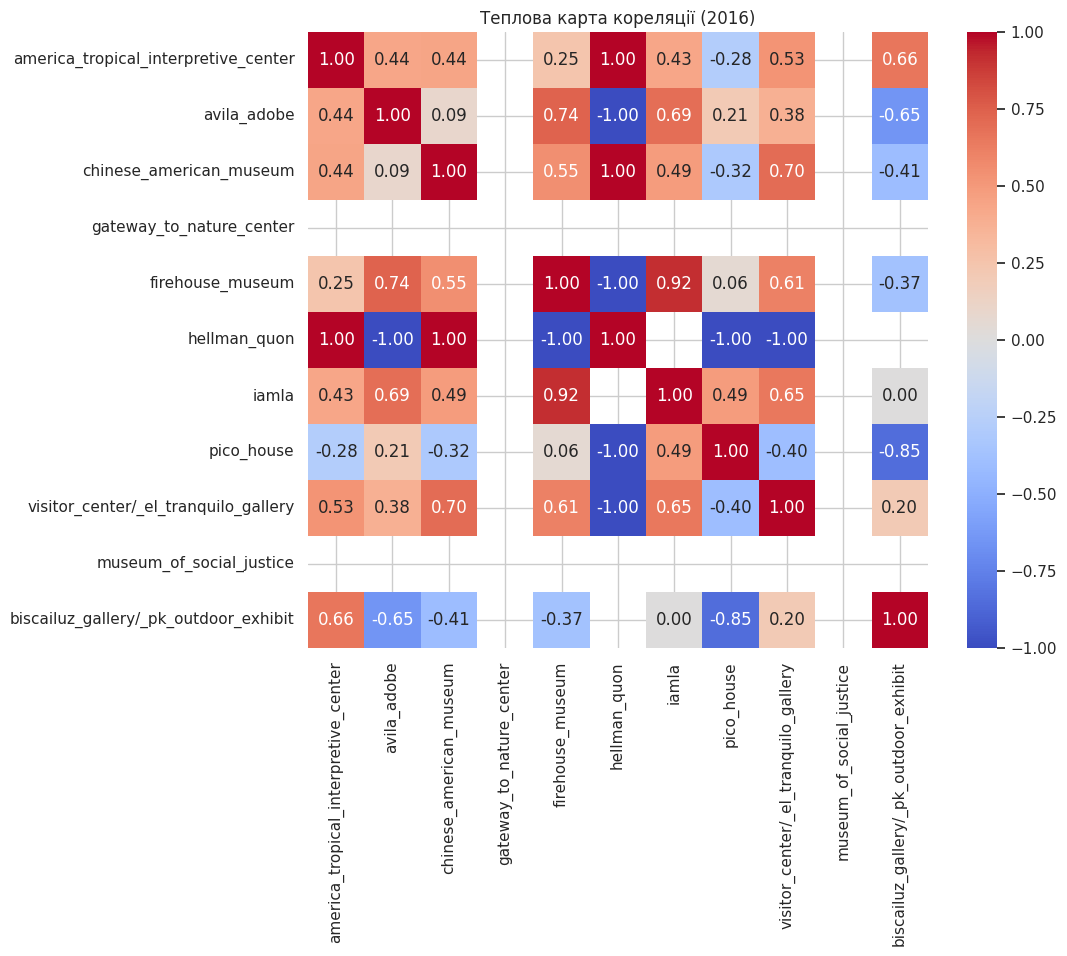

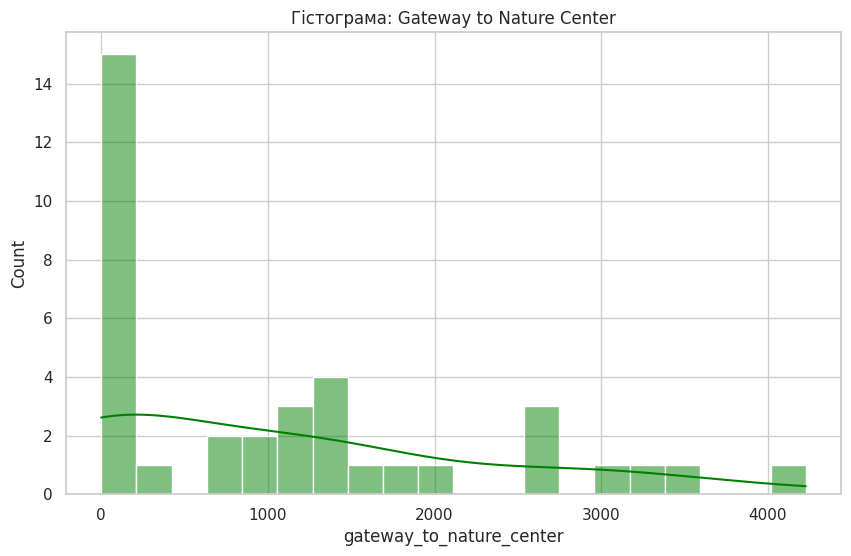

/tmp/ipython-input-2745576731.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_data, x='Average Visitors', y='Museum', palette='viridis')


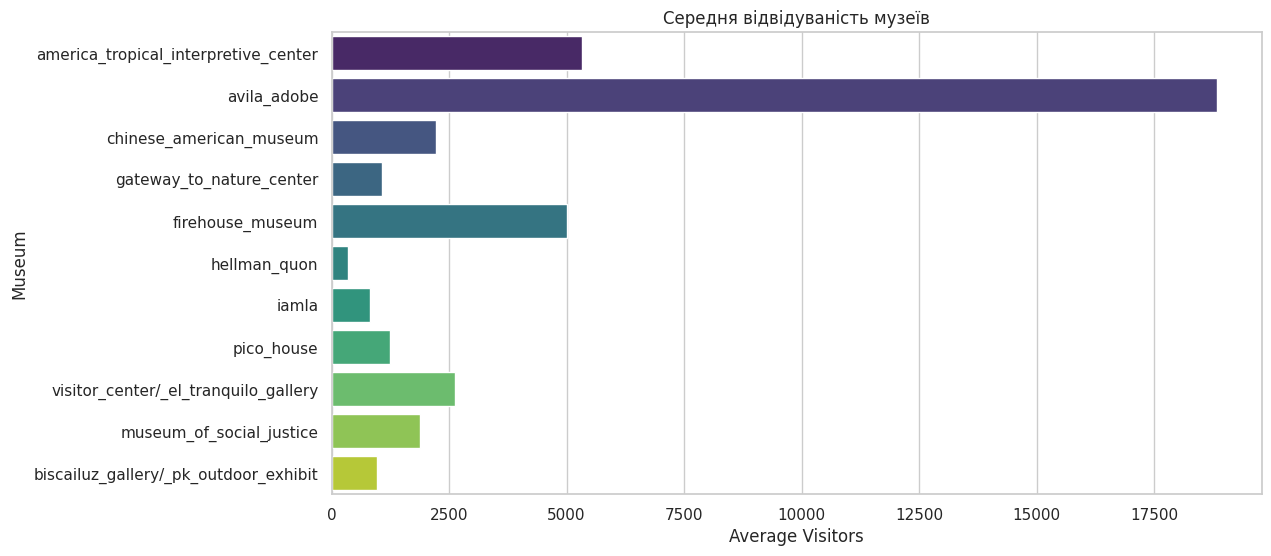

In [16]:
if 'df' in locals():
    # 11. Кореляція за 2016 рік
    df_2016 = df[df['date'].dt.year == 2016].drop(columns=['date'])
    corr_2016 = df_2016.corr()
    print("Матриця кореляції порахована.")

    # --- ГРАФІКИ ---

    # 1. Лінійний графік (Avila Adobe)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='date', y='avila_adobe')
    plt.title('Динаміка відвідуваності Avila Adobe')
    plt.show()

    # 2. Boxplot (Chinese American Museum по роках)
    df['year'] = df['date'].dt.year # Створюємо колонку року
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='year', y='chinese_american_museum')
    plt.title('Розподіл відвідувачів Chinese American Museum')
    plt.show()

    # 3. Heatmap (Кореляція)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_2016, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Теплова карта кореляції (2016)')
    plt.show()

    # 4. Histogram (Gateway to Nature Center)
    # Перевіряємо, чи є такий музей у файлі
    col_name = 'gateway_to_nature_center'
    if col_name in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col_name, bins=20, kde=True, color='green')
        plt.title('Гістограма: Gateway to Nature Center')
        plt.show()
    else:
        print(f"Графік гістограми пропущено: колонку '{col_name}' не знайдено.")

    # 5. Barplot (Середня кількість)
    avg_data = df.drop(columns=['date', 'year']).mean().reset_index()
    avg_data.columns = ['Museum', 'Average Visitors']

    plt.figure(figsize=(12, 6))
    sns.barplot(data=avg_data, x='Average Visitors', y='Museum', palette='viridis')
    plt.title('Середня відвідуваність музеїв')
    plt.show()